In [1]:
# 搜集数据
import pandas as pd
df_ads = pd.read_csv("./data/易速鲜花微信软文.csv")
df_ads.head()

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


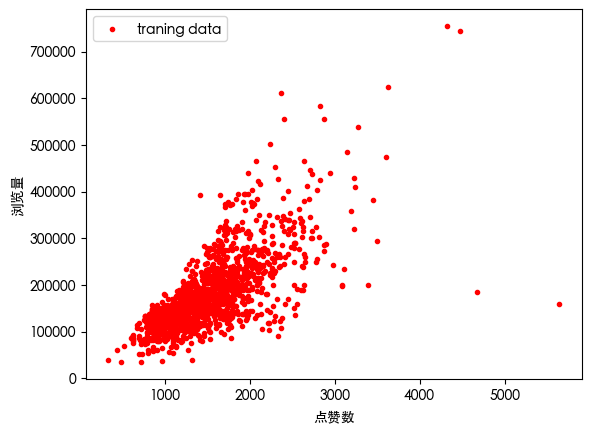

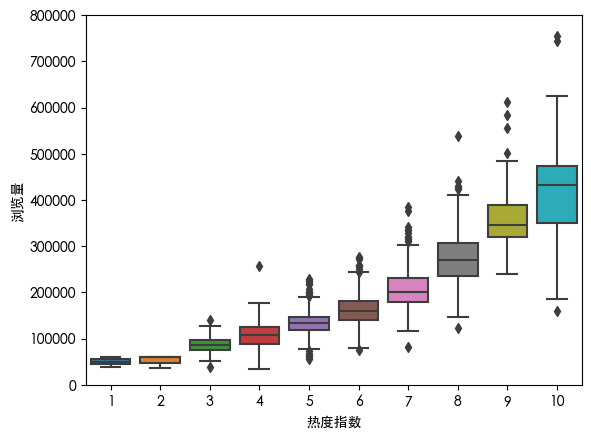

In [2]:
# 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Heiti TC'
plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='traning data')
plt.xlabel('点赞数')
plt.ylabel('浏览量')
plt.legend()
plt.show()

data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1)
fig = sns.boxplot(x='热度指数', y='浏览量', data=data)
fig.axis(ymin=0, ymax=800000);

In [3]:
# 数据清洗
# df_ads.isna().sum()
df_ads = df_ads.dropna()
X = df_ads.drop(['浏览量'], axis=1) #特征集
# X.head()
y = df_ads.浏览量 #标签集
# y.head()

In [4]:
# 拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split
# x_train 特征训练集、X_test 特征测试集
# y_train 标签训练集、y_test 标签测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# 选择算法并建立模型
from sklearn.linear_model import LinearRegression
linereg_model = LinearRegression()

In [10]:
# 训练模型
linereg_model.fit(X_train, y_train)
print('当前模型的4个特征的权重是:', linereg_model.coef_)
print('当前模型的偏置是:', linereg_model.intercept_)

当前模型的4个特征的权重是: [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的偏置是: -127493.90606857167


In [11]:
# 模型的评估和优化
y_pred = linereg_model.predict(X_test)
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['浏览量真值'] = y_test
df_ads_pred['浏览量预测值'] = y_pred
df_ads_pred # 显示数据

# 模型的评估分数
print("线性回归预测评分:", linereg_model.score(X_test, y_test))


线性回归预测评分: 0.740552064611524
